# LSN: Esercitazione 1

## Esercizio 01.1

1) Nella prima parte di questo esercizio abbiamo verificato che il valore medio di una variabile aleatoria $r$, con distribuzione di probabilità uniforme tra 0 e 1, tende asintoticamente a $1\over2$ all'aumentare del numero di misure di $r$.

Per farlo abbiamo generato $M=10^6$ numeri pseudo-casuali uniformi tra 0 e 1 utilizzando la libreria presente sul sito Ariel del corso. Per calcolare, insieme al valore medio, anche l'incertezza statistica di $\langle r\rangle$ abbiamo utilizzato il blocking method, dividendo gli $M$ tiri in $N$ blocchi da $L= M/N$ esperimenti l'uno.

Abbiamo quindi calcolato il valor medio di $r$ e la sua incertezza per un numero crescente di blocchi (da 1 fino a N), scritto i risultati su file e plottato il risultato, mostrato nella cella seguente. Possiamo osservare come le barre d'errore mostrino un buon accordo con ciò che avevamo previsto.

In [1]:
import subprocess
tmp=subprocess.call("make main01.exe", shell=True)
tmp=subprocess.call("./main01.exe")

print("Codice eseguito!")

Codice eseguito!


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy.stats

# Carico i dati da file
sum_prog, err_prog = ((np.genfromtxt('./Data/Es01.1/sum_es1.1.a.txt', usecols=i, autostrip=True)) for i in range(2))

x = np.arange(len(sum_prog))
    
# Disegno il plot
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$<r>-1/2$')
plt.grid(True)
plt.show()

2) La seconda parte richiede di seguire lo stesso procedimento fatto in precenza, ma per la varianza $\sigma^2=\langle(r-\langle r\rangle)^2\rangle={1\over12}$.

Abbiamo quindi stimato computazionalmente la varianza e la sua incertezza statistica e le abbiamo presentate nel grafico successivo. Anche in questo caso c'è una buona convergenza al valore atteso.

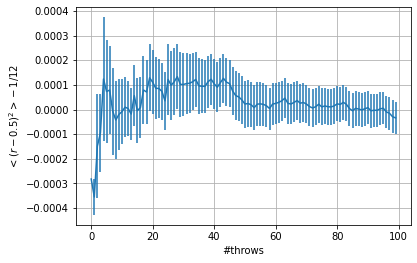

In [3]:
# Carico i dati da file
sum_prog, err_prog = ((np.genfromtxt('./Data/Es01.1/sum_es1.1.b.txt', usecols=i, autostrip=True)) for i in range(2))

x = np.arange(len(sum_prog))
    
# Disegno il plot
plt.errorbar(x, sum_prog-1/12, yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$<(r-0.5)^2>-1/12$')
plt.grid(True)
plt.show()

3) L'obiettivo di questa terza parte è calcolare il test del $\chi^2$.

Per implementare questo calcolo abbiamo diviso l'intervallo $[0,1]$ in $M=100$ sotto intervalli uguali. In seguito abbiamo generato $n=10^6$ numeri pseudo-casuali uniformi tra 0 e 1 e abbiamo contato (tramite un ciclo for che individua in quale sotto intervallo cade ogni numero) quanti eventi $n_i$ si ottengono per ogni sotto intervallo $i$.

Questo test l'abbiamo applicato ${n\over10^4} = 100$ volte: ai primi $10^4$ numeri pseudo-casuali, ai successivi $10^4$ e così via.

Abbiamo quindi utilizzato, per ogni test, la formula
\begin{equation}
\chi^2_j = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}
\end{equation}
ottenendo valori del $\chi^2$ che oscillano tra 70 e 140. La media di tutti questi valori è $\overline{\chi^2_j}\simeq100$. I risultati di questa simulazione sono mostrati nel plot presente nella cella successiva.

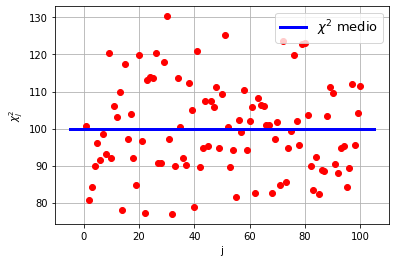

In [4]:
# Carico i dati da file
chi_quadro = np.genfromtxt('./Data/Es01.1/es1.1.c.txt', usecols=0, autostrip=True)

j = np.arange(len(chi_quadro)) + 1
    
# Calcolo la retta che indichi il valore medio di chi^2
x_mean = np.linspace(-5,105,2)
y_mean = x_mean * 0 + np.mean(chi_quadro) 

# Disegno il plot
plt.plot(j, chi_quadro, 'ro')
plt.plot(x_mean, y_mean, 'b-', linewidth=3, label=r'$\chi^2$ medio')
plt.xlabel('j')
plt.ylabel(r'$\chi^2_j$')
plt.grid(True)

# Aggiungo la legenda
plt.rc('legend', fontsize=13)
plt.legend(loc=1)
plt.show()

## Esercizio 01.2

1) Per lo svolgimento di questa prima parte abbiamo modificato la classe Random che ci è stata fornita.

In particolare, abbiamo utilizzato il metodo della trasformata per generare numeri pseudo-casuali che abbiamo una PDF esponenziale e numeri che seguano una distribuzione di Cauchy-Lorentz.

Una PDF esponenziale ha questa forma:
\begin{equation}
    p(x)=\lambda exp(-\lambda x)
\end{equation}

e la sua CDF è 
$$F(x)= 1-exp(-\lambda x)$$

Considerando $y = F(x)$, variabile aleatoria distribuita uniformemente tra 0 e 1, possiamo invertire l'equazione della CDF e ottenere una variabile aleatoria ($x$) che segue una PDF esponenziale:
$$x = -{1\over\lambda}\ln(1-y)$$

Seguendo la medesima procedura e invertendo la CDF di

$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$

otteniamo una variabile aleatoria della forma 

$$ x = \mu + \Gamma\tan{(\pi(y-\frac{1}{2}))} $$

dove $y$ è, ancora una volta, una variabile aleatoria distribuita uniformemente tra 0 e 1.

2) Nella seconda parte abbiamo verificato il teorema del limite centrale. Infatti abbiamo mostrato che, date $N$ variabili random indipendenti, la distribuzione della loro media ($S_N = \frac{1}{N}\sum_{i=1}^N x_i$) tende, al crescere di $N$, a una PDF Gaussiana se le variabili sono uniformi o esponenziali; nel caso in cui le variabili random seguono una PDF di Cauchy-Lorentz la distribuzione di probabilità limite sarà, invece, una distribuzione di Cauchy-Lorentz. I valori di $N$ che abbiamo considerato sono $1,2,10,100$.

Abbiamo quindi generato $100*10^6$ numeri casuali per tutte e tre le PDF sopra citate e calcolato $M=10^6$ volte gli $S_N$ (con $N=1,2,10 \text{ e } 100$). In seguito abbiamo plottato gli istogrammi degli $S_N$ per i diversi valori di $N$ e verificato, come mostrano i grafici presenti nelle celle seguenti, il teorema del limite centrale.

In [5]:
tmp=subprocess.call("make main02.exe", shell=True)
tmp=subprocess.call("./main02.exe")

print("Codice eseguito!")

Codice eseguito!


In [6]:
# Carico i dati da file

# Sui file gli S_N sono scritti in questo ordine:
# S_1^(0), S_2^(0), S_10^(0), S_100^(0), 
# S_1^(1), S_2^(1), S_10^(1), S_100^(1),
# ...
# dove l'indice tra parentesi rappresenta la i-esima realizzazione

S_1_unif, S_2_unif, S_10_unif, S_100_unif = ((np.genfromtxt('./Data/Es01.2/S_N_unif.txt', usecols=i, autostrip=True)) for i in range(4))
S_1_exp, S_2_exp, S_10_exp, S_100_exp = ((np.genfromtxt('./Data/Es01.2/S_N_exp.txt', usecols=i, autostrip=True)) for i in range(4))
S_1_lorentz, S_2_lorentz, S_10_lorentz, S_100_lorentz = ((np.genfromtxt('./Data/Es01.2/S_N_lorentz.txt', usecols=i, autostrip=True)) for i in range(4))

KeyboardInterrupt: 

Nella cella successiva si può osservare che le variabili random $x_i$ seguono una distribuzione uniforme e, all'aumentare di $N$, tendono a una Gaussiana, come mostra chiaramente il fit nel caso $N=100$.

In [ ]:
# Caso PDF uniforme

# Disegno gli istogrammi di S_1, S_2 e S_10
plt.subplots(figsize = (15,5))
plt.subplot(1,4,1)
plt.hist(S_1_unif, bins = 25, density = True)
plt.subplot(1,4,2)
plt.hist(S_2_unif, bins = 25, density = True)
plt.subplot(1,4,3)
plt.hist(S_10_unif, bins = 25, density = True)
plt.subplot(1,4,4)

# Disegno l'istogramma di S_100 e la Gaussiana che lo fitta
n, bins, patches = plt.hist(S_100_unif, bins = 25, density = True, color = None)
# Gaussiana
(mu, sigma) = scipy.stats.norm.fit(S_100_unif)
y = scipy.stats.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth = 3)

plt.tight_layout()
plt.show()

In questo caso invece le variabili random $x_i$ seguono una distribuzione esponenziale e, anche in questa situazione, la distribuzione limite è una Gaussiana (si veda il fit per $N=100$ ).

In [ ]:
# Caso PDF esponenziale

# Disegno gli istogrammi di S_1, S_2 e S_10
plt.subplots(figsize = (15,5))
plt.subplot(1,4,1)
plt.hist(S_1_exp, bins = 25, range = (0., 6.), density = True)
plt.subplot(1,4,2)
plt.hist(S_2_exp, bins = 25, range = (0., 6.), density = True)
plt.subplot(1,4,3)
plt.hist(S_10_exp, bins = 25, density = True)
plt.subplot(1,4,4)

# Disegno l'istogramma di S_100 e la Gaussiana che lo fitta
n, bins, patches = plt.hist(S_100_exp, bins = 25, density = True, color = None)
# Gaussiana
(mu, sigma) = scipy.stats.norm.fit(S_100_exp)
y = scipy.stats.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth = 3)

plt.tight_layout()
plt.show()

Se le $N$ variabili aleatorie $x_i$ hanno una PDF di Cauchy-Lorentz, il teorema del limite centrale enuncia che la distribuzione per grandi valori di $N$ è una Lorentziana, come si può vedere nell'ultimo istogramma.

In [ ]:
# Caso PDF Lorentziana

# Disegno gli istogrammi di S_1, S_2, S_10 e S_100
plt.subplots(figsize = (15,5))
plt.subplot(1,4,1)
plt.hist(S_1_lorentz, bins = 25, range = (-7.,7.), density = True)  # Per questi istogrammi abbiamo dovuto
plt.subplot(1,4,2)                                              # limitare il range per poter apprezzare
plt.hist(S_2_lorentz, bins = 25, range = (-7.,7.), density = True)  # un andamento lorentziano.
plt.subplot(1,4,3)                                              # Infatti le code di questa distribuzione
plt.hist(S_10_lorentz, bins = 25, range = (-7.,7.), density = True) # si estendono fino a -infinito e +infinito
plt.subplot(1,4,4)
plt.hist(S_100_lorentz, bins = 25, range = (-7.,7.), density = True)

plt.tight_layout()
plt.show()

# Esercizio 01.3

In questo esercizio abbiamo simulato l'esperimento di Buffon, per stimare (attraverso un metodo Monte Carlo) il valore di $\pi$ (e ovviamente l'incertezza statistica della stima) effettuando $M=10^5$ lanci.

Per implementare l'esperimento abbiamo considerato un "pavimento" di lato $side$. Questo pavimento ha delle righe orizzontali (parallele) separate da una distanza $d$. Su questo pavimento abbiamo fatto cadere $N_\text{throw}$ aghi lunghi $L$ $(<d)$. Per fare ciò abbiamo generato uniformemente le coordinate $x_1$ e $y_1$ di un punto (che rappresenta un estremo dell'ago) e (sempre uniformemente) un angolo $\theta$ per calcolare le coordinate $x_2 = x_1 + L\cos\theta $ e $y_2 = y_1 + L\sin\theta$ dell'altro estremo.

In realtà, abbiamo generato (e calcolato) solo le coordinate $y_1$ (e $y_2$), infatti le ascisse non sono rilevanti al fine dell'esperimento.

In seguito (utilizzando un ciclo for) abbiamo controllato se l'ago intersechi con una delle righe del pavimento e abbiamo contato il numero di aghi che effettivamente intersecano una riga ($N_\text{hit}$).

Per stimare il valore di $\pi$ abbiamo quindi utilizzato questa formula:
$$\pi = \lim_{N_\text{throw} \to \infty}\frac{2LN_\text{throw}}{N_\text{hit}d}$$

e il blocking method, stimando il valore medio di $2LN_\text{throw}/{N_\text{hit}d}$ e la sua incertezza statistica per $N=100$ blocchi.

La simulazione mostra una buona convergenza, al crescere del numero dei tiri $N_\text{throw}$, al valore atteso. Infatti le barre d'errore mostrano che c'è una buona convergenza a $\pi$.

In [ ]:
tmp=subprocess.call("make main03.exe", shell=True)
tmp=subprocess.call("./main03.exe")

print("Codice eseguito!")

In [ ]:
# Carico i dati da file
pi_prog, err_prog = ((np.genfromtxt('./Data/Es01.3/pi_es1.3.txt', usecols=i, autostrip=True)) for i in range(2))

x = np.arange(len(pi_prog))*1000
    
# Disegno il plot
plt.errorbar(x, pi_prog-np.pi, yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'<$2LN_{thr}/(N_{hit}d)$>-$\pi$')
plt.grid(True)
plt.show()

In [ ]:
tmp=subprocess.call("make clean", shell=True)